In [2]:
#IMPORTAR LIBRERIAS NECESARIAS
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

In [43]:
#cargar dataset de pruebas
df_test = pd.read_csv('text_images.csv')
df_test.head()

#0:'White',1:'Black',2:'Asian',3:'Indian',4:'other'

df_white = df_test[df_test['race'] == 0]
df_black = df_test[df_test['race'] == 1]
df_asian = df_test[df_test['race'] == 2]
df_indian = df_test[df_test['race'] == 3]
df_other = df_test[df_test['race'] == 4]

In [17]:
#RUTA PRINCIPAL DE IMAGENES
#===============================================================================#
path = '../UTKFace/'

In [46]:
#OBTENER IMAGENES ALEATORIAS DE DATASET PARA PROBAR MODELO
#=================================================================================#

def getImagesPaht(num_images):
    #['path','age','gender','race']
    amp1 = df_white.sample(n=num_images)
    amp2 = df_black.sample(n=num_images)
    amp3 = df_asian.sample(n=num_images)
    amp4 = df_indian.sample(n=num_images)
    amp5 = df_other.sample(n=num_images) 
    frames = [amp1, amp2, amp3,amp4,amp5]
    sampling = np.array(pd.concat(frames))  
    return sampling

In [7]:
#CARGAR MODELOS DE EXPERIMENTOS
#=========================================================#

model_path = 'checkpoints/experimento1/cp-class10.hdf5'
model = load_model(model_path)

model_path2 = 'checkpoints/experimento2/cp-class210.hdf5'
model2 = load_model(model_path2)

model_path3 = 'checkpoints/experimento3/cp-class20.hdf5'
model3 = load_model(model_path3)

#modelo transferin leaning (VGG16)
model_path4 = 'checkpoints/experimento4/cp-tl10.hdf5'
model4 = load_model(model_path4)

model_path5 = 'checkpoints/experimento5/cp-class20.hdf5'
model5 = load_model(model_path5)

In [8]:
gender_list={0:'Male',1:'Female'}
race_list={0:'White',1:'Black',2:'Asian',3:'Indian',4:'other'}

In [19]:
def predict(model,file,img_width,img_height):
    x = cv2.resize(file,(img_width,img_height), interpolation = cv2.INTER_CUBIC)
    x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
    x = x/255. #normalize img
    x = np.expand_dims(x, axis=0)
    result = model.predict(x,batch_size=10)
    gender = np.argmax(result[0])
    race = np.argmax(result[1])
    age = result[2][0][0]
    return gender,race,int(np.round(age))

### Graficando algunas imagenes.

In [20]:
#GRAFICAR IMAGENES
#========================================================================================#

def plotImages(model,img_witdh,img_height):
    plt.figure(figsize=(20,20))
    for i in range(25):
        path_image = path+'/'+sampling[i][0]
        img = cv2.imread(path_image)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        labels = predict(model,img,img_witdh,img_height)


        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(img)
        plt.xlabel('PREDICCION: '+
                   '\ngender: '+gender_list[labels[0]]+
                  '\netnia: '+race_list[labels[1]]+
                  '\nage: '+str(labels[2]))
        plt.title('REAL '+
                  '\ngender: '+gender_list[sampling[i][2]]+
                 '\nrace: '+race_list[sampling[i][3]]+
                 '\nage: '+str(sampling[i][1]))

    plt.tight_layout(pad=3.0)
    plt.show()

In [47]:
#OBTENIENDO MUESTRA
#==========================================================#
sampling = getImagesPaht(5)
sampling.shape

(25, 4)

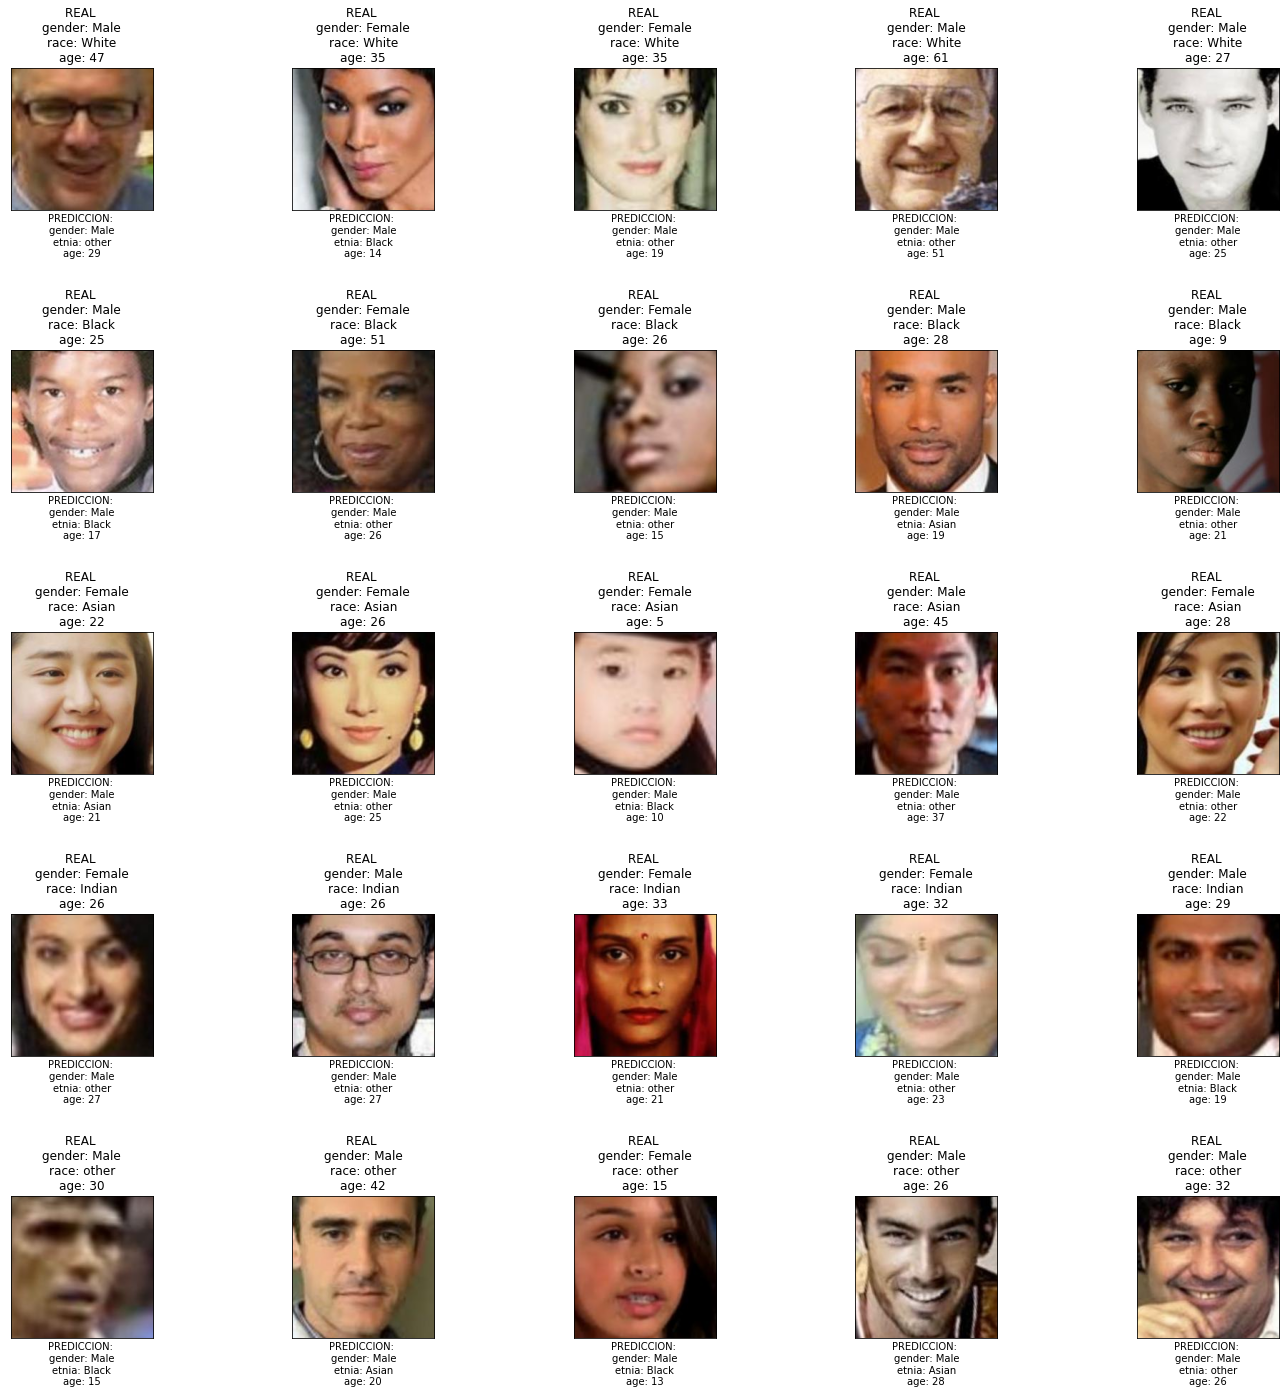

In [48]:
#MODELO 1
#===============================================================#
plotImages(model,100,100)

El primer modelo obtiene resultados mas o menos bien en predicción de la edad, obsevando que en etnia y gender no clasifica correctamente

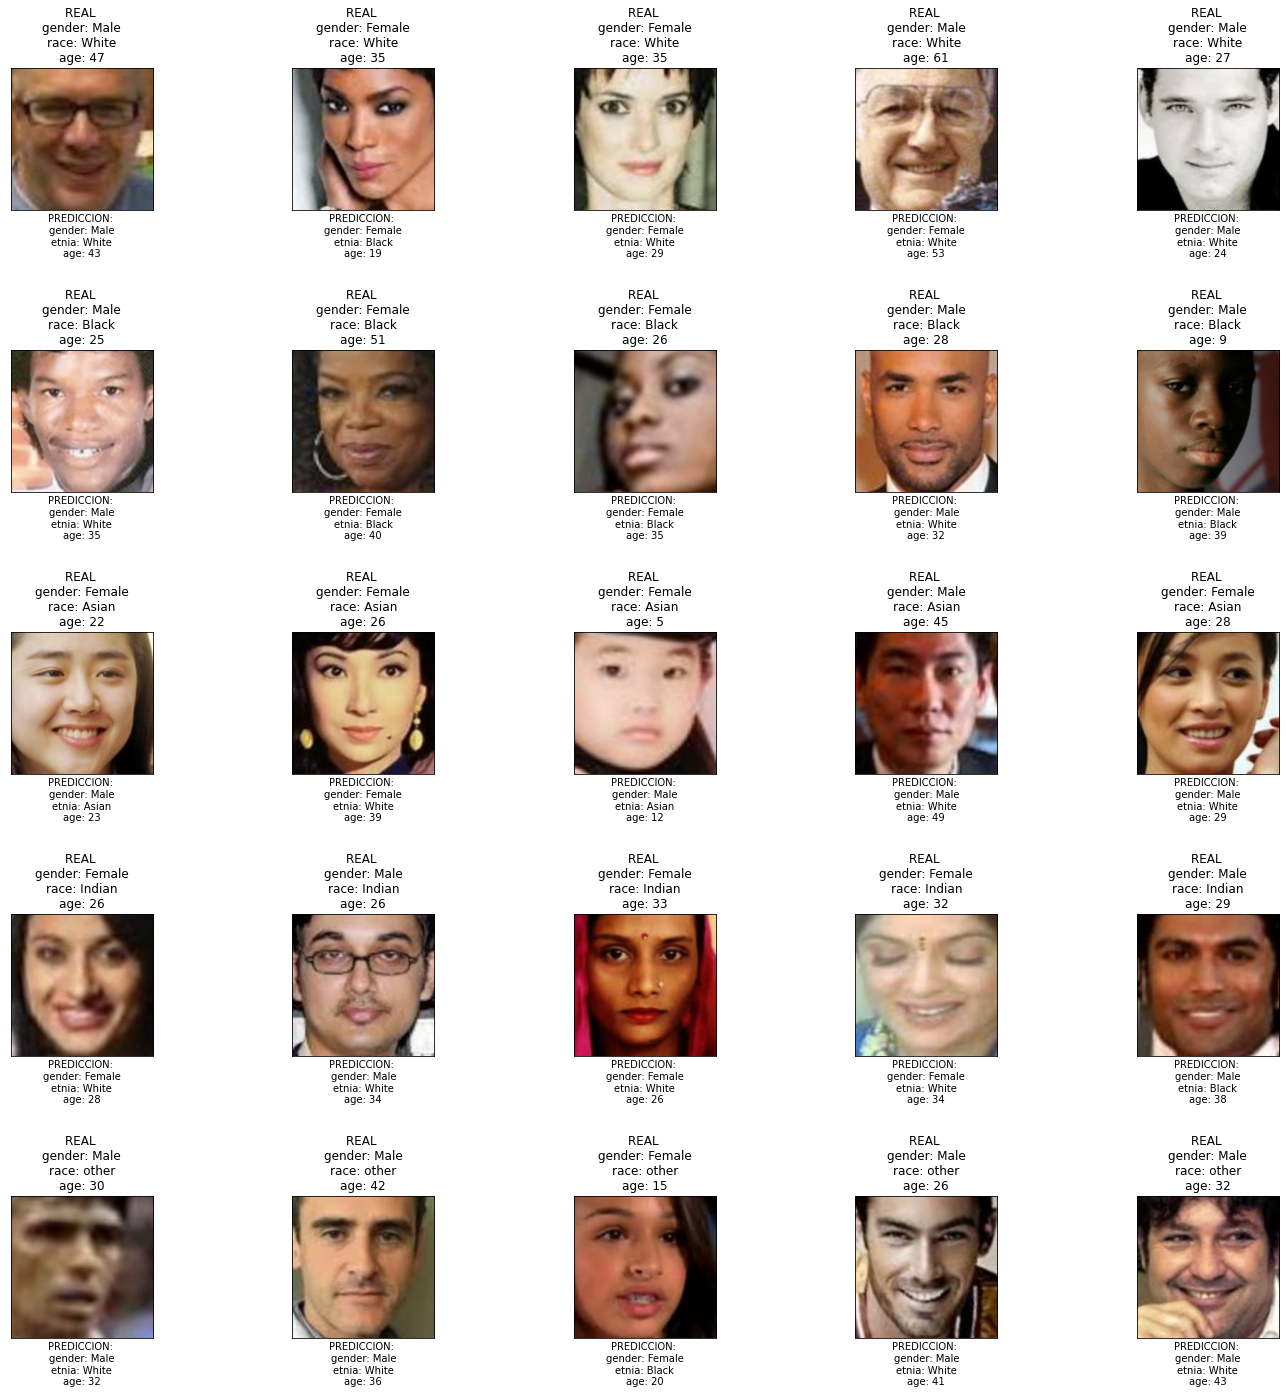

In [49]:
#MODELO 2
#======================================================================#
plotImages(model2,100,100)

el modelo mejoró considerablemente, espcificamente en el genero que clasifica muy bien, en la etnia tiende a clasificar casi siempre white debido a que las observaciones en su mayoría son white y black, se observa que no logra identifcar correctamente la etiqueta OTROS

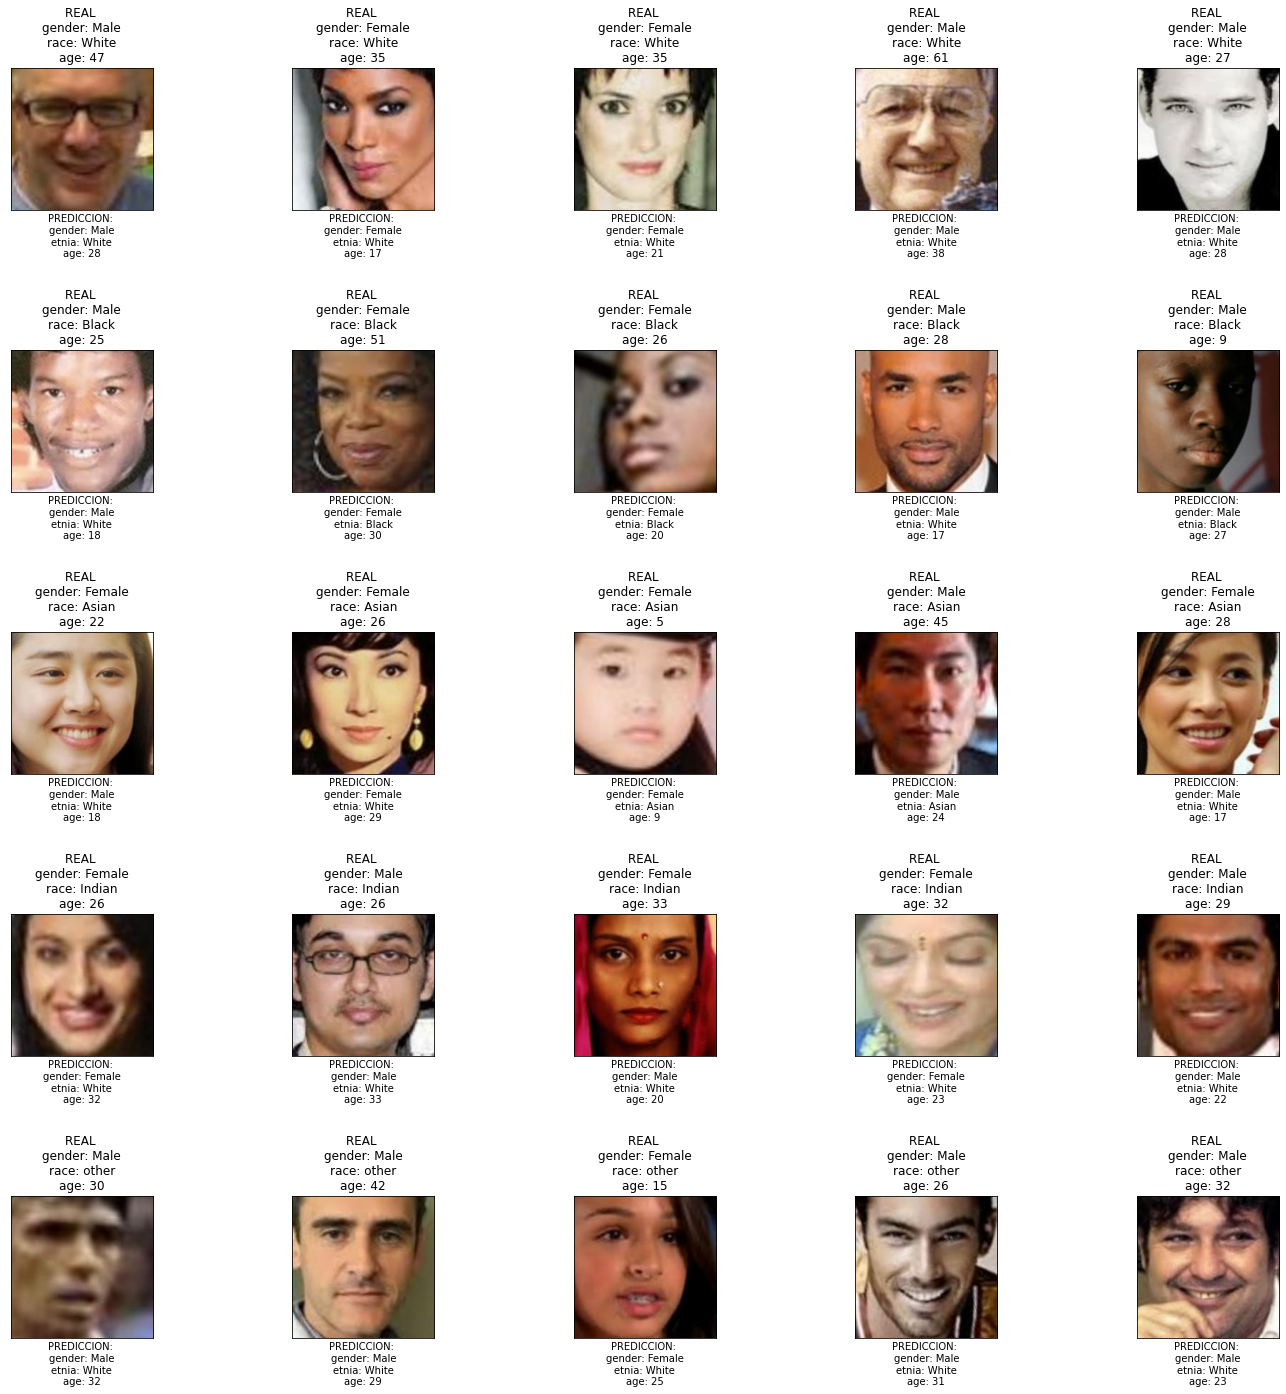

In [50]:
#MODELO 3
#======================================================================#
plotImages(model3,100,100)

El modelo logra identificar correctamente white y black

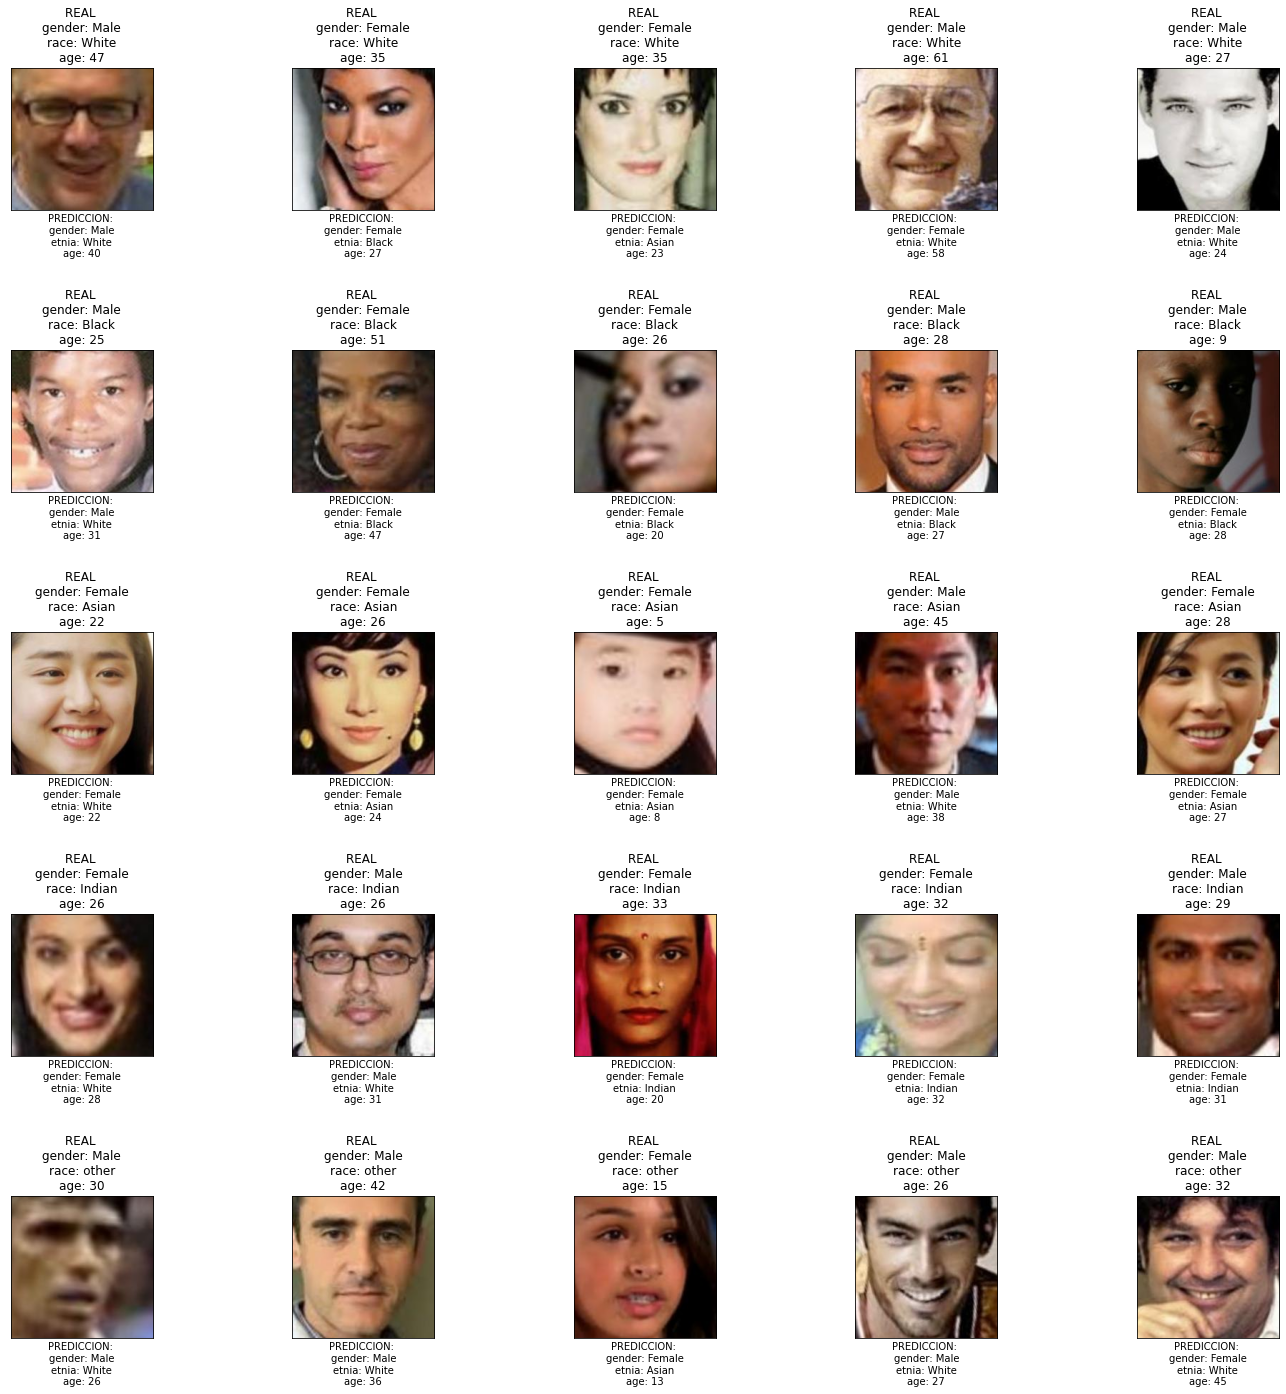

In [51]:
#MODELO 4 TRANSEFIRNG LEARNING (GNN16)
#======================================================================#
plotImages(model4,150,150)

el modelo con transfering leaning, mejoró al predecir la edad y tener mejor presición al identificar la etnia indian y asian, OTROS sigue similar a los modelos anteriores

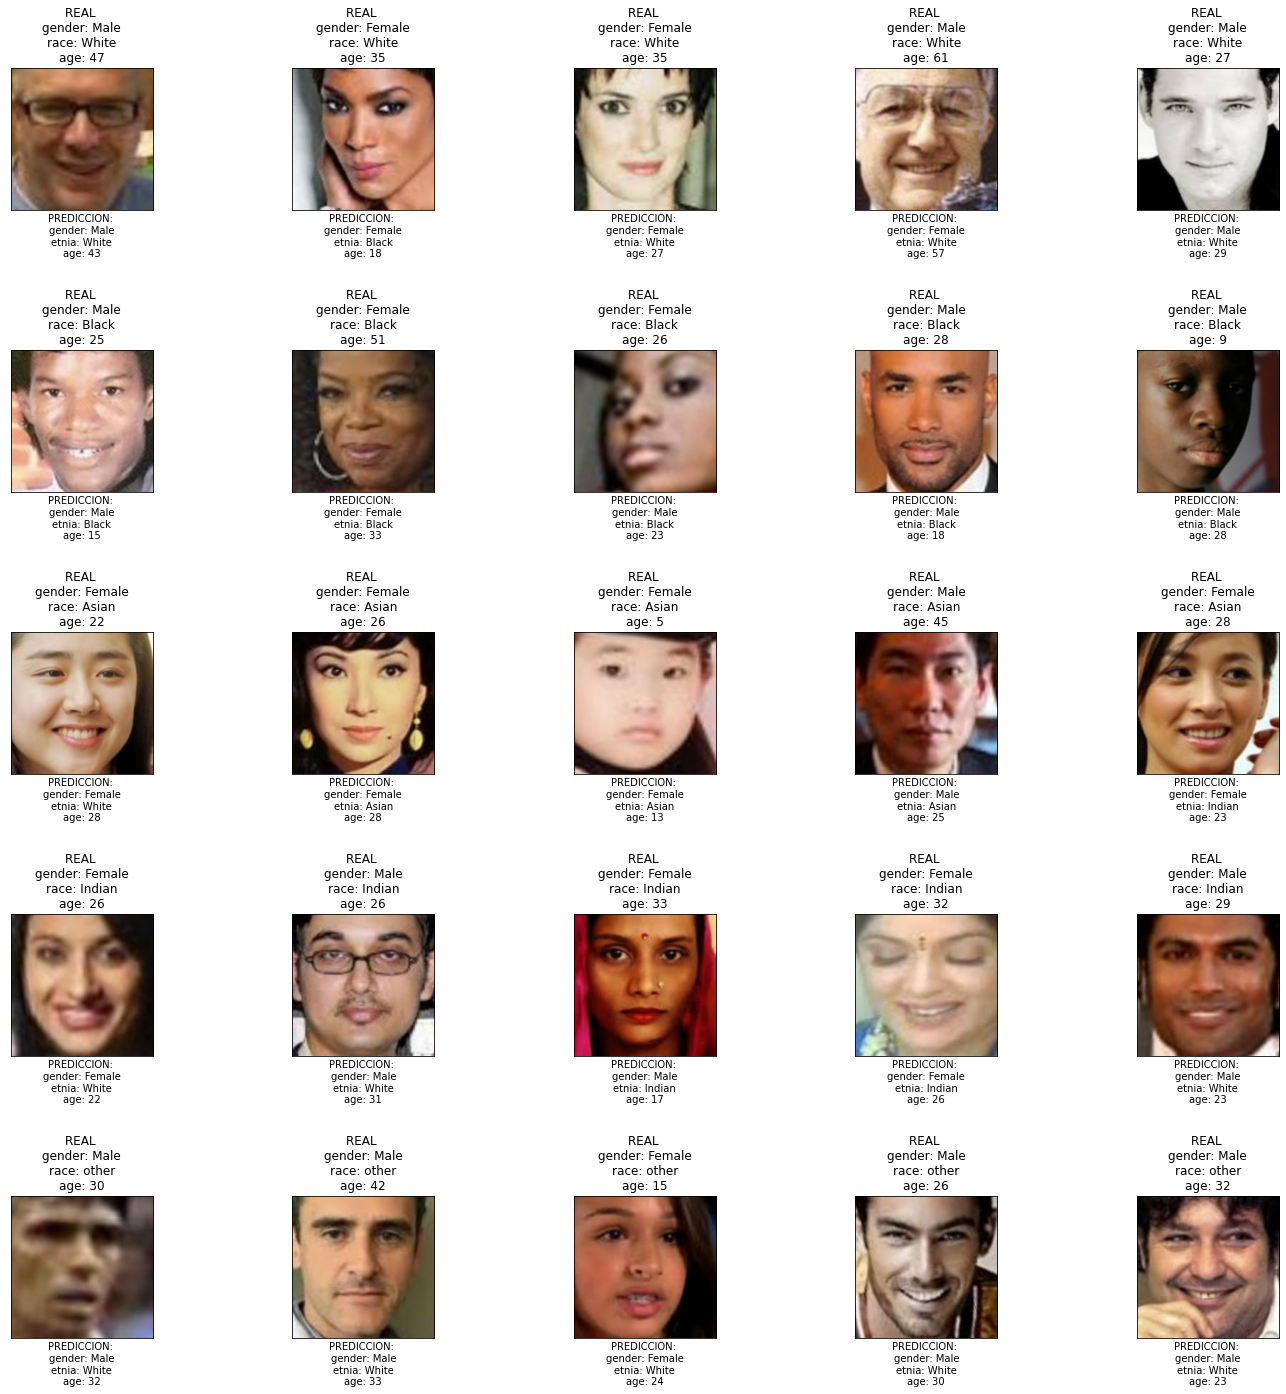

In [52]:
#MODELO 5 TRANSEFIRNG LEARNING (VGG16)
#======================================================================#
plotImages(model5,200,200)

modelo con resultados similares al modelo 4, clasifica mejor la etnia pero es decae un poco al predecir la edad.

In [57]:
import os
path_tests = 'personalize_test/'
images_tests = []
for subdir, dirs, files in os.walk(path_tests):
        for file in files:
            images_tests.append(path_tests+file)

In [72]:
#OBTENER FOSTRO EN LA IMAGEN
#============================================================================================#
face_clsfr=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
def getFaceImage(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_clsfr.detectMultiScale(
            gray,
            scaleFactor=1.3,
            minNeighbors=3,
            minSize=(30, 30)
    ) 

    for (x,y,w,h) in faces:
            face_img=image[y:y+w,x:x+w]
    
    return face_img

In [97]:
def printTest(model,images,img_witdh, img_height):
    plt.figure(figsize=(20,20))
    for i in range(5):
        path_image = images[i]
        img = cv2.imread(path_image)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        image_f = getFaceImage(img)
        labels = predict(model,image_f,img_witdh,img_height)


        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(img)
        plt.xlabel('PREDICCION: '+
                   '\ngender: '+gender_list[labels[0]]+
                  '\netnia: '+race_list[labels[1]]+
                  '\nage: '+str(labels[2]))

    plt.tight_layout(pad=3.0)
    plt.show()

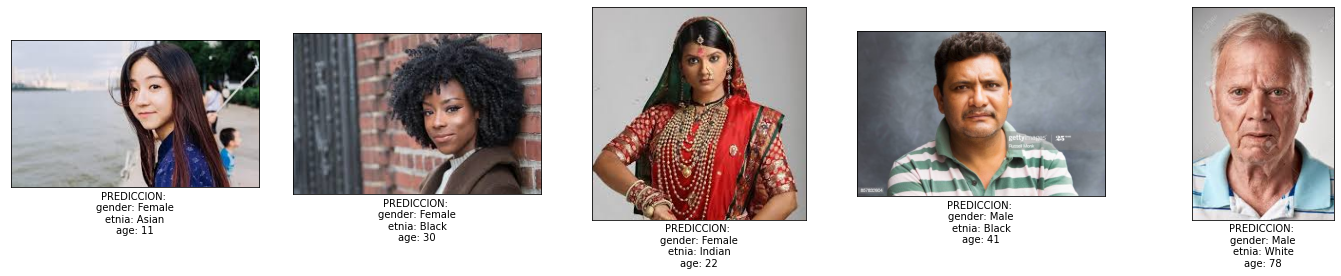

In [104]:
printTest(model4,images_tests,150,150)

### CONCLUSIONES

Los mejores modelos son el numero 4 transfering learning entrenado por 10 iteraciones, y el numero 5 entrenado con 20 iteraciones. se observa que tiene buena efectividad en clasificar el genero y etnia excepto en identificar la etiqueta OTROS. en el entranamiento y validación el modelo numero 5 tiene mejores metricas. Las muestras para este test se tomaron de forma aleatoria.

observando imagenes de prueba descargadas, el modelo4 obtiene mas presición.

#### Mejoras.

* Aumentar el numero de iteraciones (por complejidad computacional no me permite realizarlo en mi maquina)
* Balancear el numero de observaciones para las clasificaciones.

In [53]:
# PROBANDO MODELO ENTIEMPO REAL
#==============================================================================#
face_clsfr=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

source=cv2.VideoCapture(0)

videoPath = 'monica.mp4'
#source = cv2.VideoCapture(videoPath)

color_dict={0:(255,0,0),1:(0,255,0)}

while(True):

    ret,img=source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,5)  
    draw = img.copy()

    for (x,y,w,h) in faces:
        face_img=draw[y:y+w,x:x+w]

        labels=predict(model5,face_img,200,200)
        gender = labels[0]
        race = labels[1]
        age = labels[2]
        
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[gender],1)
        cv2.rectangle(img,(x,y-60),(x+w,y),color_dict[gender],-1)
        cv2.putText(img, 'gender:'+gender_list[gender], (x+10, y-50),cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,255,255),1)
        cv2.putText(img, 'race: '+race_list[race], (x+10, y-35),cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,255,255),1)
        cv2.putText(img, 'age: '+str(age), (x+10, y-20),cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,255,255),1)
        
        
    cv2.imshow('LIVE',img)
    
    key = cv2.waitKey(1)

    # quit camera if 'q' key is pressed
    if key & 0xFF == ord("q"):
        break
        
cv2.destroyAllWindows()
source.release()

In [34]:
cv2.destroyAllWindows()
source.release()